In [51]:
import math
import matplotlib
import numpy as np
import pandas as pd

from datetime import date, datetime, time, timedelta
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


%matplotlib inline

stk_path = "C:/Users/Parikshit Ghosh/Downloads/ML models/NSRGY.csv"
test_size = 0.2                 
cv_size = 0.2                   
Nmax = 30                       
                                
fontsize = 14
ticklabelsize = 14

In [52]:
def get_preds_lin_reg(df, target_col, N, pred_min, offset):
    
    regr = LinearRegression(fit_intercept=True)

    pred_list = []

    for i in range(offset, len(df['adj_close'])):
        X_train = np.array(range(len(df['adj_close'][i-N:i]))) 
        y_train = np.array(df['adj_close'][i-N:i]) 
        X_train = X_train.reshape(-1, 1)      
                                             
                            
        y_train = y_train.reshape(-1, 1)
        regr.fit(X_train, y_train)            
        pred = regr.predict(np.array(N).reshape(1,-1))
    
        pred_list.append(pred[0][0])  
    
    pred_list = np.array(pred_list)
    pred_list[pred_list < pred_min] = pred_min
        
    return pred_list

def get_mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [53]:
df = pd.read_csv(stk_path, sep = ",")


df.loc[:, 'Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')


df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]


df['month'] = df['date'].dt.month

df.sort_values(by='date', inplace=True, ascending=True)

df.head(10)

,date,open,high,low,close,adj_close,volume,month
0,2011-06-13,62.849998,63.000000,62.799999,62.830002,47.913074,309800,6
1,2011-06-14,62.889999,63.160000,62.810001,62.830002,47.913074,522600,6
2,2011-06-15,62.279999,62.360001,61.200001,61.349998,46.784447,527200,6
3,2011-06-16,61.580002,61.880001,61.250000,61.459999,46.868332,473800,6
4,2011-06-17,62.040001,62.169998,61.650002,61.880001,47.188625,454900,6
5,2011-06-20,62.290001,62.810001,62.209999,62.349998,47.547031,381800,6
6,2011-06-21,62.439999,62.680000,62.230000,62.560001,47.707172,337700,6
7,2011-06-22,61.700001,62.360001,61.610001,61.849998,47.165741,402100,6
8,2011-06-23,61.599998,61.790001,61.000000,61.639999,47.005596,491000,6
9,2011-06-24,61.930000,62.009998,61.560001,61.700001,47.051353,563500,6


Text(0, 0.5, 'USD')

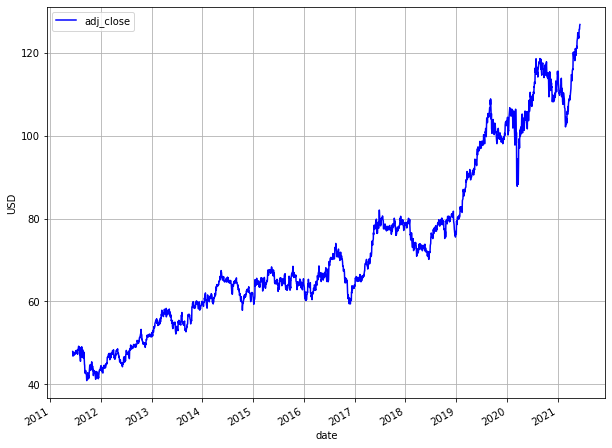

In [54]:

rcParams['figure.figsize'] = 10, 8 

ax = df.plot(x='date', y='adj_close', style='b-', grid=True)
ax.set_xlabel("date")
ax.set_ylabel("USD")

In [55]:
num_cv = int(cv_size*len(df))
num_test = int(test_size*len(df))
num_train = len(df) - num_cv - num_test
print("num_train = " + str(num_train))
print("num_cv = " + str(num_cv))
print("num_test = " + str(num_test))

train = df[:num_train].copy()
cv = df[num_train:num_train+num_cv].copy()
train_cv = df[:num_train+num_cv].copy()
test = df[num_train+num_cv:].copy()
print("train.shape = " + str(train.shape))
print("cv.shape = " + str(cv.shape))
print("train_cv.shape = " + str(train_cv.shape))
print("test.shape = " + str(test.shape))

num_train = 1510
num_cv = 503
num_test = 503
train.shape = (1510, 8)
cv.shape = (503, 8)
train_cv.shape = (2013, 8)
test.shape = (503, 8)


Text(0, 0.5, 'USD')

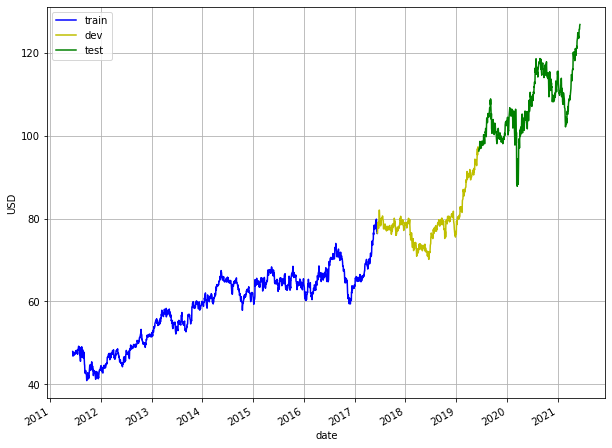

In [56]:

rcParams['figure.figsize'] = 10, 8

ax = train.plot(x='date', y='adj_close', style='b-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

In [57]:
RMSE = []
R2 = []
mape = []
for N in range(1, Nmax+1):
    est_list = get_preds_lin_reg(train_cv, 'adj_close', N, 0, num_train)
    
    cv.loc[:, 'est' + '_N' + str(N)] = est_list
    RMSE.append(math.sqrt(mean_squared_error(est_list, cv['adj_close'])))
    R2.append(r2_score(cv['adj_close'], est_list))
    mape.append(get_mape(cv['adj_close'], est_list))
print('RMSE = ' + str(RMSE))
print('R2 = ' + str(R2))
print('MAPE = ' + str(mape))
cv.head()

RMSE = [0.6822323612808783, 0.9630847301772827, 0.8780141502277946, 0.8707269850452292, 0.8798196165068759, 0.885048648256784, 0.8977529774664829, 0.9183099186163608, 0.9423968727006582, 0.9683198652197847, 0.9944229227317112, 1.0175183068592497, 1.0408323517658853, 1.0661116851948758, 1.0894998858703333, 1.109027000175684, 1.1226522355139883, 1.12959943109259, 1.1336393695921785, 1.1394470829078989, 1.149288816372084, 1.1630989321379874, 1.1773994160420218, 1.1929536835202246, 1.2100610841543666, 1.2257894109221288, 1.2425146288874196, 1.2596123430836894, 1.275784004661132, 1.2910322542436492]
R2 = [0.9858147931415988, 0.9717316776197921, 0.9765050745410806, 0.9768934530421582, 0.9764083496553301, 0.976127091830387, 0.9754368110174874, 0.9742990254533086, 0.9729330878256666, 0.971423520511144, 0.9698620786737089, 0.9684459212880935, 0.9669833803455428, 0.9653601144669003, 0.9638235939668496, 0.962515192896422, 0.9615884765447219, 0.9611116093097288, 0.960832948320114, 0.96043060928957

,date,open,high,low,close,adj_close,volume,month,est_N1,est_N2,...,est_N21,est_N22,est_N23,est_N24,est_N25,est_N26,est_N27,est_N28,est_N29,est_N30
1510,2017-06-13,83.169998,83.589996,83.139999,83.290001,76.578117,834100,6,76.394226,76.311478,...,78.780203,79.013373,79.188857,79.300153,79.364589,79.355883,79.417094,79.570741,79.701503,79.833736
1511,2017-06-14,83.800003,84.070000,82.910004,83.160004,76.458595,298300,6,76.578117,76.762008,...,78.286959,78.497067,78.737507,78.923326,79.047575,79.126284,79.133777,79.207499,79.369833,79.509996
1512,2017-06-15,82.550003,84.279999,82.349998,83.930000,77.166542,487500,6,76.458595,76.339073,...,77.792664,78.018255,78.233682,78.478875,78.672453,78.807091,78.897637,78.918978,79.003336,79.172897
1513,2017-06-16,85.239998,85.809998,85.099998,85.699997,78.793915,252900,6,77.166542,77.874489,...,77.580016,77.691444,77.912177,78.124799,78.367299,78.561508,78.699740,78.795732,78.824865,78.914468
1514,2017-06-19,85.629997,85.680000,85.309998,85.489998,78.600830,246300,6,78.793915,80.421288,...,77.622354,77.791388,77.888375,78.091921,78.290160,78.519215,78.703801,78.835866,78.928084,78.956254


(2.0, 30.0)

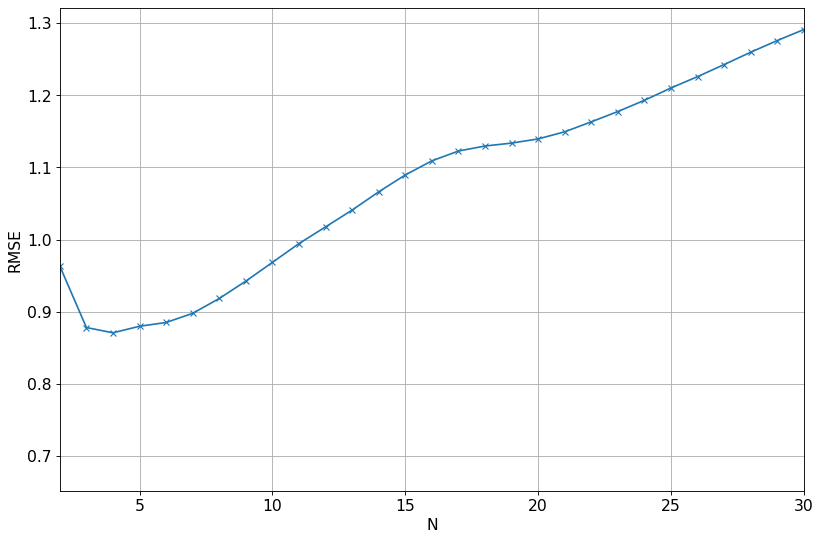

In [58]:
matplotlib.rcParams.update({'font.size': 14})
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, Nmax+1), RMSE, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('RMSE')
plt.xlim([2, 30])

Text(0, 0.5, 'R2')

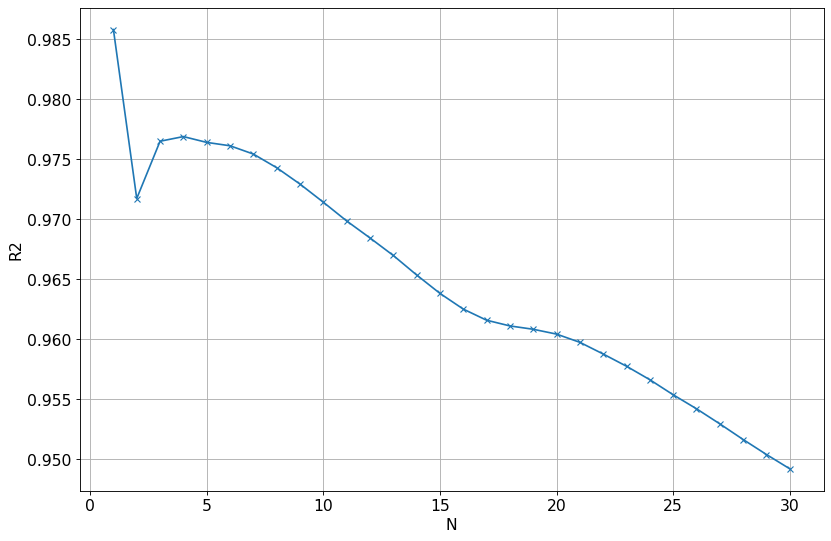

In [59]:
matplotlib.rcParams.update({'font.size': 14})
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, Nmax+1), R2, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('R2')

Text(0, 0.5, 'MAPE')

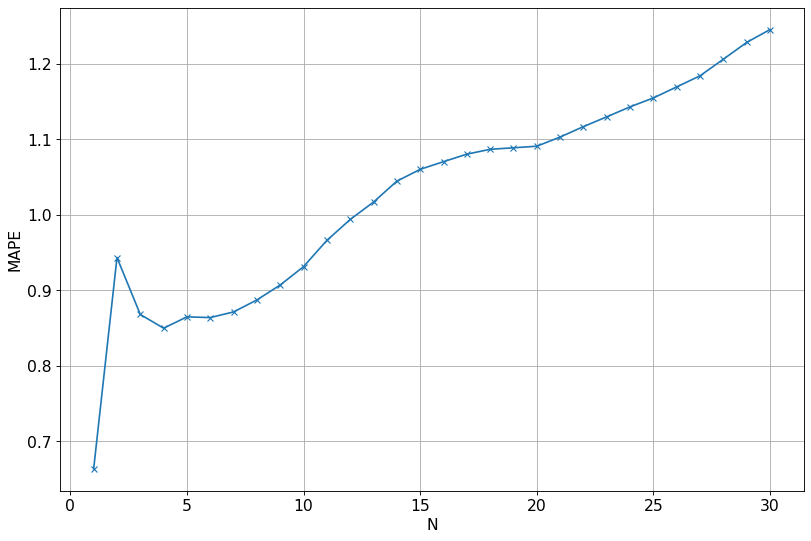

In [60]:
# Plot MAPE versus N. Note for MAPE smaller better. 
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, Nmax+1), mape, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('MAPE')

In [61]:
N_opt = 5

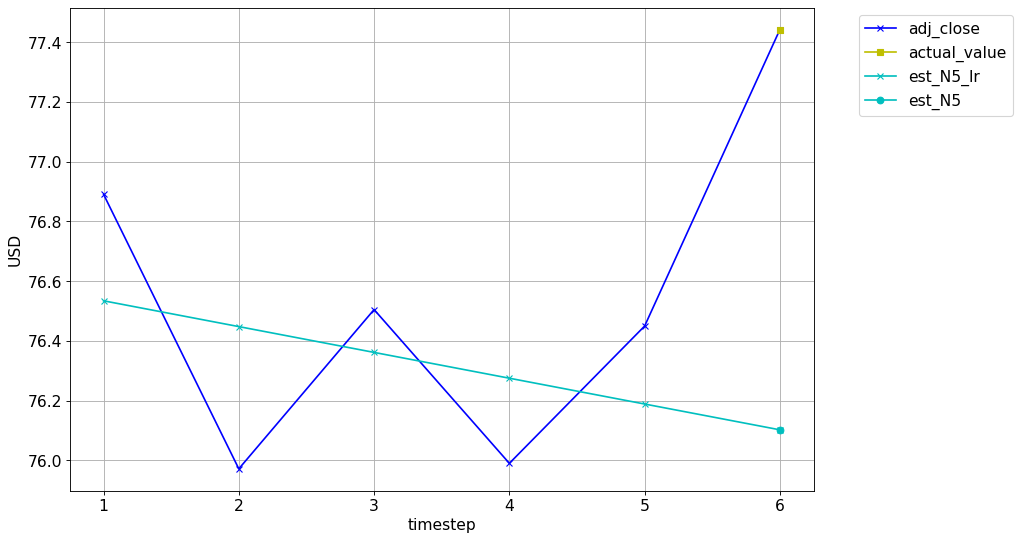

In [62]:
day = pd.Timestamp(date(2017, 10, 31))

Nmax2 = 5

df_temp = cv[cv['date'] <= day]
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1,Nmax2+2), df_temp[-Nmax2-1:]['adj_close'], 'bx-')
plt.plot(Nmax2+1, df_temp[-1:]['adj_close'], 'ys-')
legend_list = ['adj_close', 'actual_value']


color_list = ['r', 'g', 'k', 'y', 'm', 'c', '0.75']
marker_list = ['x', 'x', 'x', 'x', 'x', 'x', 'x']
regr = LinearRegression(fit_intercept=True)
for N in range(5, Nmax2+1):
    X_train = np.array(range(len(df_temp['adj_close'][-N-1:-1])))
    y_train = np.array(df_temp['adj_close'][-N-1:-1])
    X_train = X_train.reshape(-1, 1)     
    y_train = y_train.reshape(-1, 1)
    regr.fit(X_train, y_train)            
    y_est = regr.predict(X_train)         
    plt.plot(range(Nmax2+1-N,Nmax2+2), 
             np.concatenate((y_est, np.array(df_temp['est_N'+str(N)][-1:]).reshape(-1,1))),
             color=color_list[N%len(color_list)], 
             marker=marker_list[N%len(marker_list)])
    legend_list.append('est_N'+str(N)+'_lr')
    
    plt.plot(Nmax2+1, 
             df_temp['est_N'+str(N)][-1:], 
             color=color_list[N%len(color_list)], 
             marker='o')
    legend_list.append('est_N'+str(N))
    

plt.grid()
plt.xlabel('timestep')
plt.ylabel('USD')
plt.legend(legend_list, bbox_to_anchor=(1.05, 1))
matplotlib.rcParams.update({'font.size': fontsize})

Text(0, 0.5, 'USD')

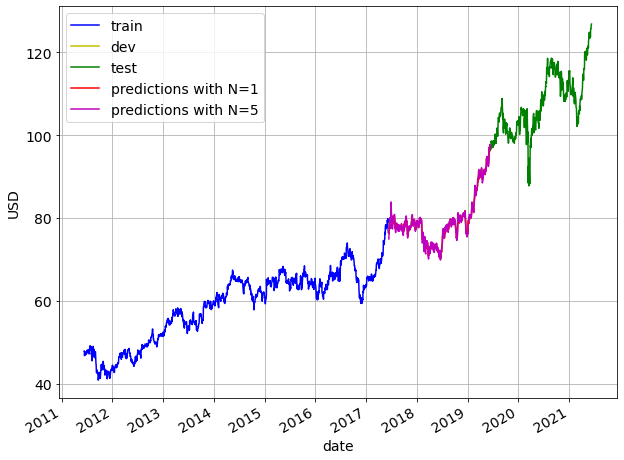

In [63]:
rcParams['figure.figsize'] = 10, 8 

ax = train.plot(x='date', y='adj_close', style='b-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N1', style='r-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N5', style='m-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions with N=1', 'predictions with N=5'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

Text(0.5, 1.0, 'Zoom in to dev set')

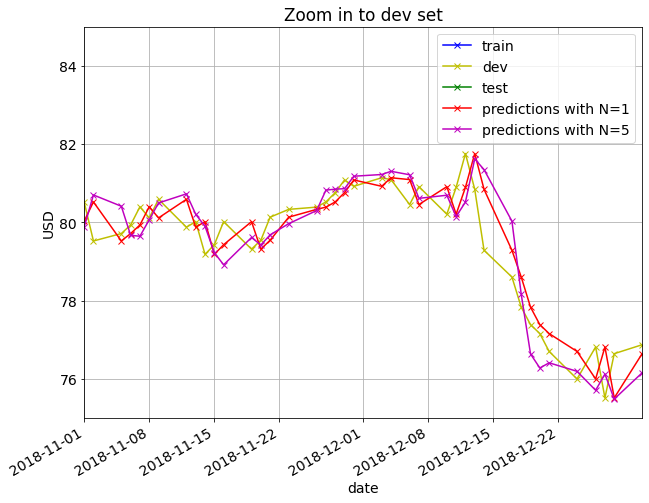

In [64]:
rcParams['figure.figsize'] = 10, 8 

ax = train.plot(x='date', y='adj_close', style='bx-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='yx-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='gx-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N1', style='rx-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N5', style='mx-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions with N=1', 'predictions with N=5'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2018, 11, 1), date(2018, 12, 31)])
ax.set_ylim([75,85])
ax.set_title('Zoom in to dev set')

In [65]:
est_list = get_preds_lin_reg(df, 'adj_close', N_opt, 0, num_train+num_cv)
test.loc[:, 'est' + '_N' + str(N_opt)] = est_list
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(est_list, test['adj_close'])))
print("R2 = %0.3f" % r2_score(test['adj_close'], est_list))
print("MAPE = %0.3f%%" % get_mape(test['adj_close'], est_list))
test.head()

RMSE = 1.667
R2 = 0.949
MAPE = 1.151%


,date,open,high,low,close,adj_close,volume,month,est_N5
2013,2019-06-13,101.860001,101.919998,101.279999,101.389999,96.278038,430200,6,96.932307
2014,2019-06-14,101.870003,101.980003,101.389999,101.709999,96.581909,428600,6,96.137505
2015,2019-06-17,101.379997,101.949997,101.360001,101.750000,96.619888,280200,6,96.285640
2016,2019-06-18,102.529999,102.550003,101.989998,102.220001,97.066193,661500,6,96.491695
2017,2019-06-19,101.449997,102.050003,101.080002,101.949997,96.809799,843400,6,96.931350


Text(0, 0.5, 'USD')

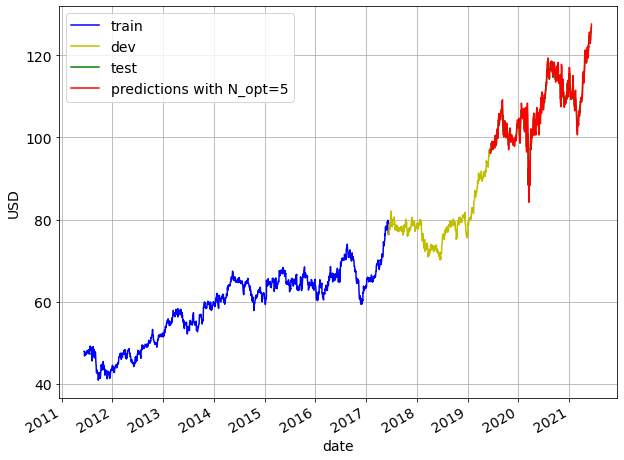

In [66]:
rcParams['figure.figsize'] = 10, 8 

ax = train.plot(x='date', y='adj_close', style='b-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)
ax = test.plot(x='date', y='est_N5', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions with N_opt=5'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

Text(0.5, 1.0, 'Zoom in to test set')

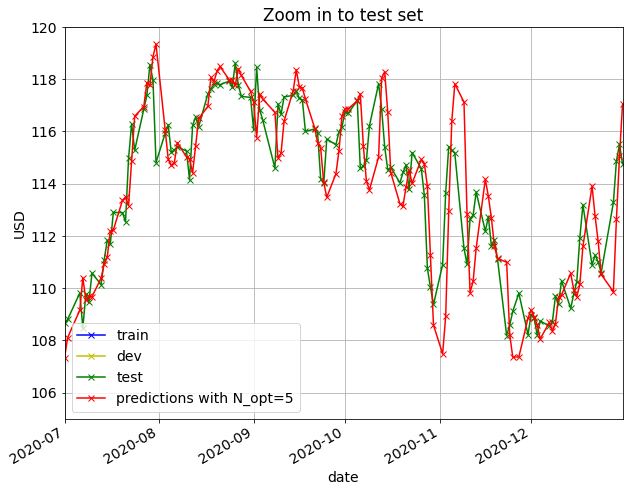

In [67]:
rcParams['figure.figsize'] = 10, 8 

ax = train.plot(x='date', y='adj_close', style='bx-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='yx-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='gx-', grid=True, ax=ax)
ax = test.plot(x='date', y='est_N5', style='rx-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions with N_opt=5'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2020, 7, 1), date(2020, 12, 31)])
ax.set_ylim([105,120])
ax.set_title('Zoom in to test set')

(105.0, 120.0)

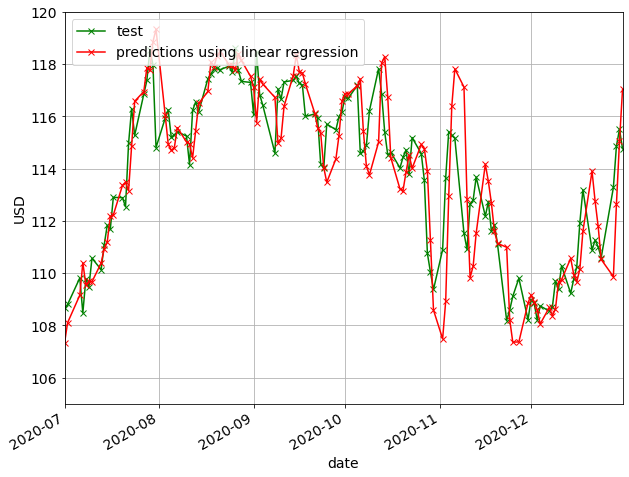

In [68]:
rcParams['figure.figsize'] = 10, 8
matplotlib.rcParams.update({'font.size': 14})

ax = test.plot(x='date', y='adj_close', style='gx-', grid=True)
ax = test.plot(x='date', y='est_N5', style='rx-', grid=True, ax=ax)
ax.legend(['test', 'predictions using linear regression'], loc='upper left')
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2020, 7, 1), date(2020, 12, 31)])
ax.set_ylim([105,120])

In [69]:
test_lin_reg_NSRGY = test
test_lin_reg_NSRGY.to_csv("C:/Users/Parikshit Ghosh/Downloads/ML models/test_lin_reg_NSRGY.csv")